In [2]:
!pip install gensim


In [3]:
import gensim

import gensim.downloader

Part 1: Word Embeddings

In [4]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['dog']

# Getting the most similar words

print(model.most_similar('dog'))

# Getting the similarity between two words

print(model.similarity('dog', 'cat'))


[('cat', 0.8798074126243591), ('dogs', 0.8344309329986572), ('pet', 0.7449564337730408), ('puppy', 0.7236376404762268), ('horse', 0.7109653949737549), ('animal', 0.6817063093185425), ('pig', 0.655417263507843), ('boy', 0.6545307636260986), ('cats', 0.6471933126449585), ('rabbit', 0.6468630433082581)]
0.87980753


Part 1a

In [5]:

#find the most similar words to a word of your choice. 
#Does the result make sense? Look up some of the words if you don't know them
#Share and discuss with your group

In [6]:
papaya = model['papaya']
print(model.most_similar('papaya'))

[('mango', 0.8455770015716553), ('guava', 0.7919566035270691), ('avocado', 0.7560545802116394), ('pineapple', 0.7478629350662231), ('jackfruit', 0.6849250197410583), ('citrus', 0.6755866408348083), ('coconut', 0.6652673482894897), ('watermelon', 0.6577839255332947), ('pomegranate', 0.6526557803153992), ('tomato', 0.6498623490333557)]


In [7]:
juice = model['juice']
print(model.most_similar('juice'))

[('lemon', 0.8233426809310913), ('vinegar', 0.7732073068618774), ('lime', 0.7639415860176086), ('sauce', 0.7204378843307495), ('grapefruit', 0.7199090123176575), ('syrup', 0.7161567807197571), ('yogurt', 0.7134124040603638), ('soda', 0.7080042362213135), ('cream', 0.7028740048408508), ('sugar', 0.7018996477127075)]


In [8]:
kpop = model['kpop']
print(model.most_similar('kpop'))

[('similarly-named', 0.7487618923187256), ('killraven', 0.7240790128707886), ('technopop', 0.7211103439331055), ('techno-pop', 0.7191766500473022), ('nautch', 0.7166478037834167), ('tyrolese', 0.7133880257606506), ('silkmen', 0.7103589177131653), ('tried-and-true', 0.7061872482299805), ('taqwacore', 0.7042140364646912), ('i.grieve', 0.7037255764007568)]


In [9]:
thailand = model['thailand']
print(model.most_similar('thailand'))

[('malaysia', 0.8454005718231201), ('indonesia', 0.8392362594604492), ('cambodia', 0.8067820072174072), ('philippines', 0.7756374478340149), ('thai', 0.7647047638893127), ('laos', 0.7451275587081909), ('myanmar', 0.7355331182479858), ('vietnam', 0.7335624694824219), ('singapore', 0.7311114072799683), ('china', 0.7213686108589172)]


In [10]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))



[('paris', 0.8827143311500549), ('france', 0.755802571773529), ('french', 0.7075165510177612), ('prohertrib', 0.6943174600601196), ('berlin', 0.6665561199188232), ('brussels', 0.6574430465698242), ('lyon', 0.6526200771331787), ('london', 0.64079749584198), ('le', 0.6403627991676331), ('strasbourg', 0.6346526145935059)]
[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.45332765579223633), ('non-arabs', 0.45208773016929626), ('amerindians', 0.4478238821029663), ('buffalos', 0.4475123882293701), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.4440663158893585), ('dingos', 0.44403281807899475)]
[('dogs', 0.8921768665313721), ('cats', 0.8814380764961243), ('dog', 0.7873795628547668), ('animals', 0.7512702345848083), ('pets', 0.7392118573188782), ('cows', 0.6835324168205261), ('pet', 0.679297685623169), ('horses', 0.6774964332580566), ('pigs', 0.6755765080451965), ('animal', 0.6683686971664429)]


In [11]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)



[('menstruating', 0.6102039813995361), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693746566772), ('uterus', 0.5093088746070862), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483376502991), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.500389039516449)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.42151397466659546), ('nistelrooy', 0.41140034794807434), ('strachan', 0.4089668393135071), ('rafa', 0.40728434920310974), ('technicals', 0.4060872495174408), ('allardyce', 0.4018688201904297), ('boss', 0.40107354521751404), ('rangers', 0.39962300658226013), ('utd', 0.3967454135417938)]


[('doctor', 0.8661209940910339),
 ('nurse', 0.7757077813148499),
 ('physician', 0.7128061652183533),
 ('woman', 0.7089030742645264),
 ('doctors', 0.6793617010116577),
 ('pregnant', 0.6787967085838318),
 ('patient', 0.6772218346595764),
 ('dentist', 0.6694242358207703),
 ('mother', 0.6586815714836121),
 ('medical', 0.6466937065124512)]

Part 1b

In [12]:
#try to isolate a specific dimension in the embeddings and add it to multiple words. 
#does this show any bias or assumptions in the data? 
# Discuss with your group and share most interesting dimension in the document

In [13]:
plural=model["cats"]-model["cat"]
plural_papayas = model["papaya"]+plural
print(model.most_similar(plural_papayas))

[('papaya', 0.7904391884803772), ('avocados', 0.6418156623840332), ('mangoes', 0.6256507039070129), ('citrus', 0.604296088218689), ('guava', 0.5964270234107971), ('mango', 0.5898423194885254), ('avocado', 0.5685142874717712), ('fruits', 0.5473276376724243), ('jackfruit', 0.5457736849784851), ('pineapples', 0.5399782061576843)]


In [14]:
plural_juices = model["juice"]+plural
print(model.most_similar(plural_juices))

[('juice', 0.8414071202278137), ('vinegar', 0.6907360553741455), ('lemon', 0.6564624905586243), ('juices', 0.6347324252128601), ('sugar', 0.6225659251213074), ('milk', 0.6206724047660828), ('zest', 0.6130619645118713), ('oranges', 0.6104826927185059), ('ingredients', 0.6088257431983948), ('grapefruit', 0.602215051651001)]


In [15]:
plural_kpops = model["kpop"]+plural
print(model.most_similar(plural_kpops))

[('lowlanders', 0.6331303119659424), ('dorniers', 0.6194746494293213), ('kpop', 0.617343544960022), ('whitmans', 0.6166823506355286), ('3,273', 0.6038331985473633), ('lakhmids', 0.602695107460022), ('firebugs', 0.6010134816169739), ('selenites', 0.6000686883926392), ('galwegians', 0.59977787733078), ('samhitas', 0.5996826887130737)]


In [16]:
plural_thailands = model["thailand"]+plural
print(model.most_similar(plural_thailands))

[('thailand', 0.8301125168800354), ('malaysia', 0.7191286683082581), ('indonesia', 0.6976925730705261), ('cambodia', 0.6889203190803528), ('laos', 0.6780762672424316), ('bangkok', 0.6203875541687012), ('bangladesh', 0.6161741018295288), ('myanmar', 0.6153393983840942), ('brunei', 0.6128337979316711), ('singapore', 0.6065292954444885)]


Part 2: Visualization and Embeddings in Space

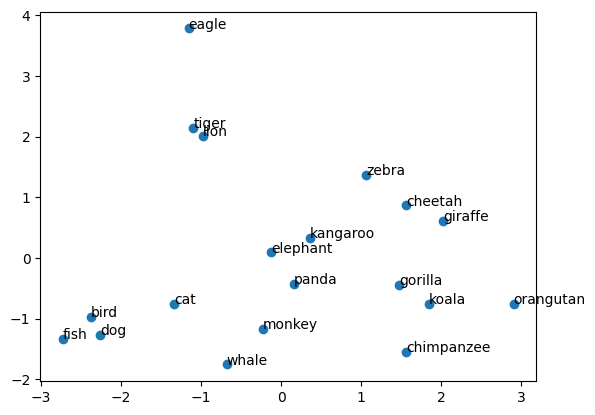

In [17]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

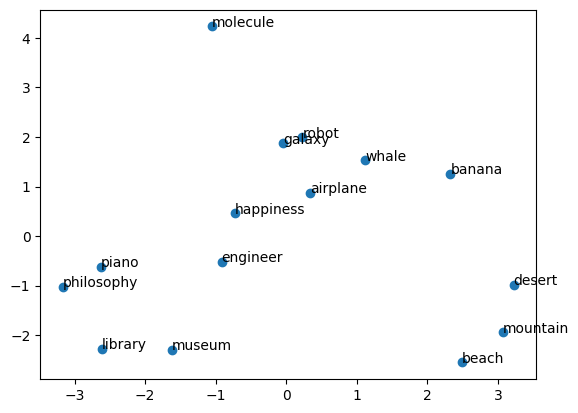

In [18]:
#repeat this process with your own set of 10-20 words. 
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.
words=["banana", "mountain", "robot", "beach", "galaxy", "engineer", "happiness", "piano", "airplane", "library", "desert", "philosophy", "whale", "museum", "molecule"]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

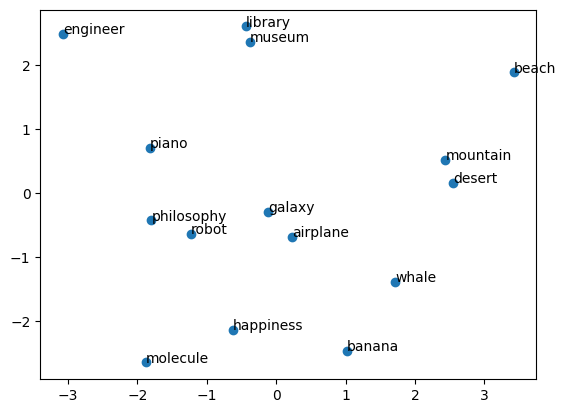

In [19]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?
twitter_model= gensim.downloader.load("glove-twitter-100")
words=["banana", "mountain", "robot", "beach", "galaxy", "engineer", "happiness", "piano", "airplane", "library", "desert", "philosophy", "whale", "museum", "molecule"]

X=[twitter_model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()


Part 3: Embedding reddit posts

In [20]:
#read in uiuc csv
import pandas as pd

uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])


In [21]:
#using the code from project 1, clean the text and create a bag of words representation of the text
def clean(text):
    text = ' '.join(text.split())
    text = text.lower()
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
data['cleaned_text'] = data['text'].apply(clean)
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(data['cleaned_text'])

In [23]:
bag_of_words

<9450x16186 sparse matrix of type '<class 'numpy.int64'>'
	with 227183 stored elements in Compressed Sparse Row format>

In [24]:
#using the embedding code from last week, plot a pca of all posts in the subreddits data set

#color by the "label" column to see if the two subreddits are separable in the embedding space

# is there a clear separation between the two columns? 

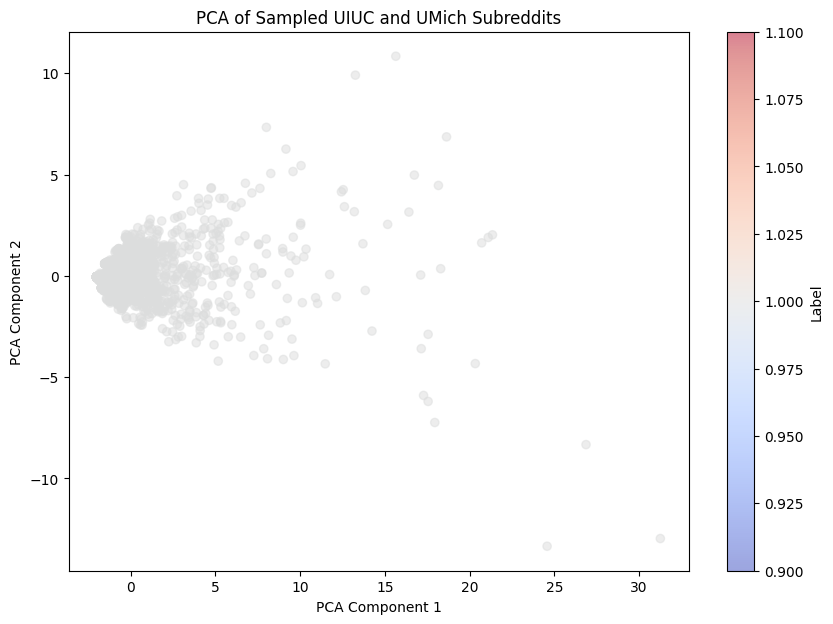

In [25]:
sample_size = 2000
bag_of_words_sampled = bag_of_words[:sample_size].toarray()
pca = PCA(n_components=2)
pca_result = pca.fit_transform(bag_of_words_sampled)
plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=data['label'][:sample_size], cmap="coolwarm", alpha=0.5)
plt.colorbar(label="Label")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA of Sampled UIUC and UMich Subreddits")
plt.show()

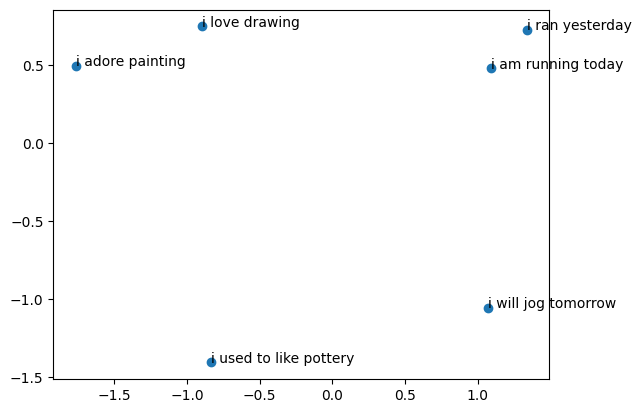

In [26]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]

#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

In [27]:

#use this function to calculate the average embedding of each post in the dataset

#plot the pca of the average embeddings, color by the "label" column

#how is this plot different from the previous one?

#is there clear separation? 

/opt/anaconda3/envs/is310/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/envs/is310/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/envs/is310/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/envs/is310/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


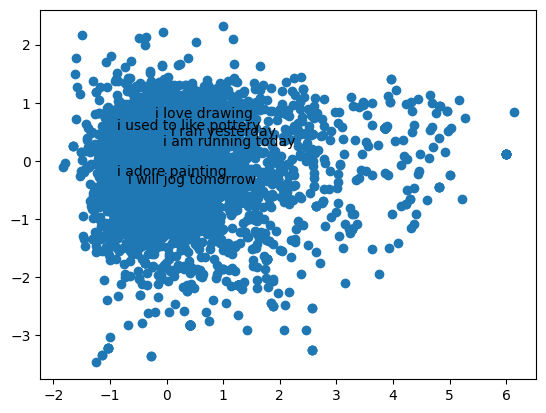

In [28]:
#here is a function to calculate the average embedding of a cleaned document

data['avg_embedding'] = data['cleaned_text'].apply(lambda x: avg_embedding(x, model))
avg_embeddings=[avg_embedding(sentence, model) for sentence in data['cleaned_text']]
avg_embeddings=[embedding for embedding in avg_embeddings if not np.isnan(embedding).any()]

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

Part 4: HuggingFace and BERT

In [29]:
!pip install transformers

In [30]:
#Please wait until after next week to start

# Use a pipeline as a high-level helper
from transformers import pipeline

#download bert model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")


All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at finiteautomata/bertweet-base-sentiment-analysis.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


AttributeError: module 'ml_dtypes' has no attribute 'float8_e3m4'


In [31]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I love this class")

[{'label': 'POS', 'score': 0.9911694526672363}]

In [33]:
#use the pipeline to classify the sentiment of all posts in the reddit dataset
#report the most common sentiment label
data['sentiment'] = data['text'].apply(lambda x: pipe(x[:100])[0]['label'])
most_common_sentiment = data['sentiment'].mode()[0]
print(f"The most common sentiment label is: {most_common_sentiment}")

The most common sentiment label is: NEU


In [34]:
#look at ten sample posts and labels; do you agree with all of them? 
sample_posts = data[['text', 'sentiment']].sample(n=10)
for index, row in sample_posts.iterrows():
    print(f"Post: {row['text']}")
    print(f"Predicted Sentiment: {row['sentiment']}")
    print("\n")

Post: how many Palestinians were killed by Israel in 2023 before October 7th?
Predicted Sentiment: NEG


Post: Lenovo yoga is a good option. Runs windows and can get a good processor on it too. It can fold and touchscreen with a stylus so it is great for note taking as well. Mine worked through 4 years of umich CS very well
Predicted Sentiment: POS


Post: Selling Texas, Arkansas, USC n Oregon
Predicted Sentiment: NEU


Post: Like...for the semester?

There is no overnight parking during the week anywhere on campus (without a proper permit). E14 and F23 only have overnight parking on weekends. You will not find parking near Sherman without a permit (if there are even permits still available). You'd have to find free street parking off campus and bus back. Just make sure you move the car every couple days. Good luck!
Predicted Sentiment: NEU


Post: your aid will be applied to your account sometime before the end of august, but you should see your totals in “Financial Aid Information” a

In [35]:
#is the UIUC or Michigan subreddit more negative?
uiuc_negative = data[(data['label'] == 1) & (data['sentiment'] == 'NEG')].shape[0]
mich_negative = data[(data['label'] == 0) & (data['sentiment'] == 'NEG')].shape[0]

uiuc_total = data[data['label'] == 1].shape[0]
mich_total = data[data['label'] == 0].shape[0]

uiuc_negativity = uiuc_negative / uiuc_total
mich_negativity = mich_negative / mich_total 

uiuc_negativity
mich_negativity

0.2615873015873016